# Support Vector Machines (Linearly Inseparable Data)



---

In this notebook, we use support vector machines with nonlinear kernels to find the best hyperplane that separates the data. We address two cases, noisy data and linearly inseparable data.

## Packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from matplotlib import pyplot as plt

## Noisy data

### Data

In [2]:
X1 = np.c_[np.random.normal(0, 3, 100)-5*0.8, np.random.normal(0, 3, 100)-5*0.8]
X2 = np.c_[np.random.normal(0, 3, 100)+3, np.random.normal(0, 3, 100)+3]
X = np.concatenate((X1, X2))
y = np.concatenate([np.zeros(100), np.ones(100)])
X.shape, y.shape

((200, 2), (200,))

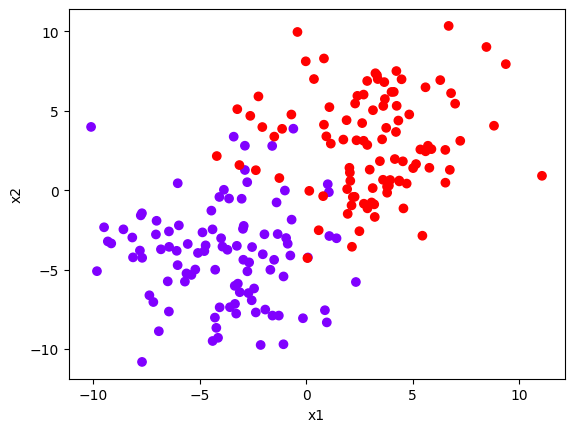

In [7]:
plt.scatter(X[:,0], X[:,1], c=y, cmap="rainbow")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

- It seems that the data is somewhat linearly separable but there is some noise.

### Linear SVM

- Let's first try to fit a support vector machine model with linear kernel:

In [4]:
clf = SVC(kernel="linear")

clf.fit(X, y)
sv = clf.support_vectors_

### Plot the decision boundary

In [5]:
def get_x2_coord(x1, c0, c1, c2):
  return -(c0+c1*x1)/c2

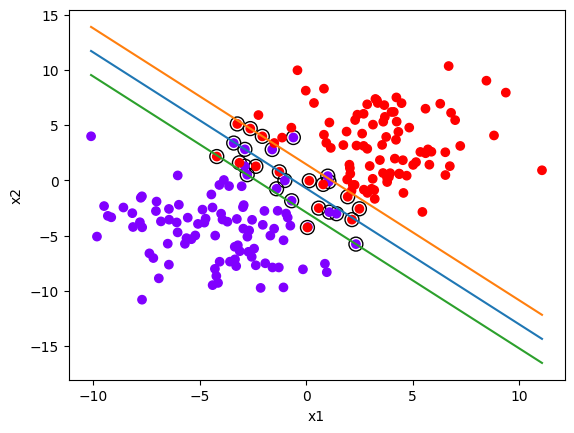

In [9]:
# plot the supporting vectors
sv = clf.support_vectors_
plt.scatter(sv[:,0], sv[:,1], s=100, facecolors='none', edgecolors="black")
plt.scatter(X[:,0], X[:,1], c=y, cmap="rainbow")

# plot the decision boundary
c0, c1, c2 = clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]

x_min, x_max = X[:,0].min(), X[:,0].max()
x1_range = np.linspace(x_min, x_max, 100)
plt.plot(x1_range, get_x2_coord(x1_range, c0, c1, c2))

# plot the lines that passes through the supporting vectors
d1 = 1 / np.linalg.norm(clf.coef_)
d2 = d1 / np.sin(np.pi / 2 + np.arctan(-c1 / c2)) # the margin

plt.plot(x1_range, get_x2_coord(x1_range, c0, c1, c2) + d2)
plt.plot(x1_range, get_x2_coord(x1_range, c0, c1, c2) - d2)

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Polynomial kernel

- Let's now try to fit a support vector machine model with polynomial kernel:

In [24]:
clf = SVC(kernel="poly", coef0=20)

clf.fit(X, y)
cv = clf.support_vectors_

### Plot the decision boundary

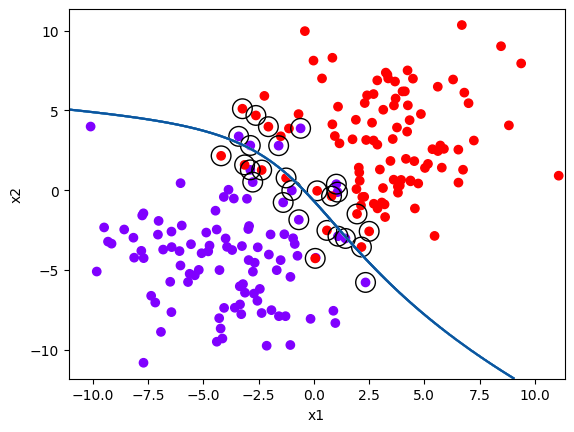

In [25]:
# plot the supporting vectors
plt.scatter(X[:,0], X[:,1], c=y, cmap="rainbow")
plt.scatter(sv[:,0], sv[:,1], s=200, facecolors='none', edgecolors="black")

# Create a meshgrid to plot the decision boundary
x1_min, x2_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
x2_min, x2_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x2_max, 0.01),
                               np.arange(x2_min, x2_max, 0.01))

# Predict class using the classifier for each point in the mesh
y_pred = clf.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()])
y_pred = y_pred.reshape(x1_grid.shape)

# Plot the decision boundaries
plt.contour(x1_grid, x2_grid, y_pred.astype(float), cmap=plt.cm.Blues)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Linearly inseparable data (example 1)

### Data

In [31]:
r = 10
w = 6
n = 500
d=-4

a = np.random.uniform(0, 1, (n,1)) * np.pi
b = (np.random.uniform(0, 1, (n,1)) - 0.5) * w/2
A1 = np.c_[np.cos(a) * (r + b), np.sin(a) * (r + b)]

A2 = np.c_[A1[:,0]+r , -A1[:,1]-d]

X = np.concatenate([A1, A2])
y = np.concatenate([np.zeros(n), np.ones(n)])
X.shape, y.shape

((1000, 2), (1000,))

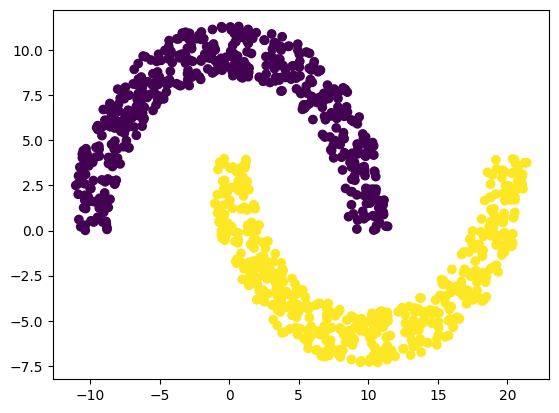

In [32]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

- The data is linearly inseparable.

### RBF kernel

- Let's fit a support vector machine model with an RBF kernel to the data:

In [33]:
clf = SVC(kernel="rbf")
clf.fit(X, y)
sv = clf.support_vectors_

### Plot the decision boundary

In [35]:
def get_x3_coord(x1, x2, c0, c1, c2, c3):
  return -(c0+c1*x1+c2*x2)/c3

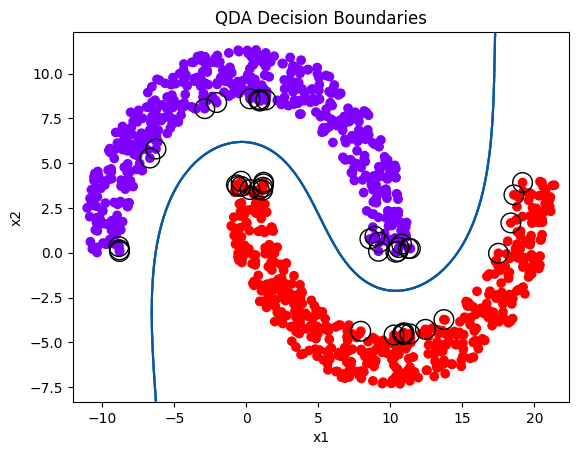

In [37]:
# plot the supporting vectors
plt.scatter(X[:,0], X[:,1], c=y, cmap="rainbow")
plt.scatter(sv[:,0], sv[:,1], s=200, facecolors='none', edgecolors="black")

# Create a mesh to plot the decision boundaries
x1_min, x1_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
x2_min, x2_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                     np.arange(x2_min, x2_max, 0.01))

# Predict class for each point in the grid
y_pred = clf.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()])
y_pred = y_pred.reshape(x1_grid.shape)

# Plot the decision boundary
plt.contour(x1_grid, x2_grid, y_pred.astype(float), cmap=plt.cm.Blues)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('QDA Decision Boundaries')
plt.show()

## Linearly inseparable data (example 2)

### Data

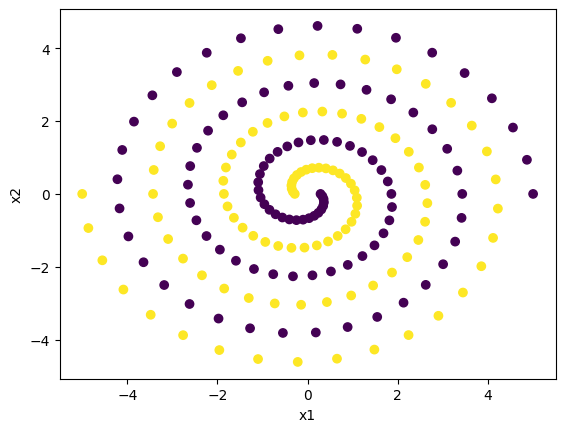

In [47]:
t = np.linspace(0, 6 * np.pi, 100)
r = 5 * (105 - np.arange(100)) / 105;
b = 0.1
x1 = r * np.cos(t)
x2 = r * np.sin(t)

x1 = np.concatenate((x1,-x1))
x2 = np.concatenate((x2,-x2))

X = np.c_[x1, x2]
y = np.concatenate([np.zeros(100), np.ones(100)])

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Gaussian kernel

In [42]:
def gaussianKernelGramMatrixFull(X1, X2, sigma=0.1):
    """(Pre)calculates Gram Matrix K"""

    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            x1 = x1.flatten()
            x2 = x2.flatten()
            gram_matrix[i, j] = np.exp(- np.sum( np.power((x1 - x2),2) ) / float( 2*(sigma**2) ) )
    return gram_matrix

In [43]:
clf = SVC(C=0.1, kernel="precomputed")
clf.fit(gaussianKernelGramMatrixFull(X,X), y)
sv = clf.support_vectors_

### Plot the decision boundary

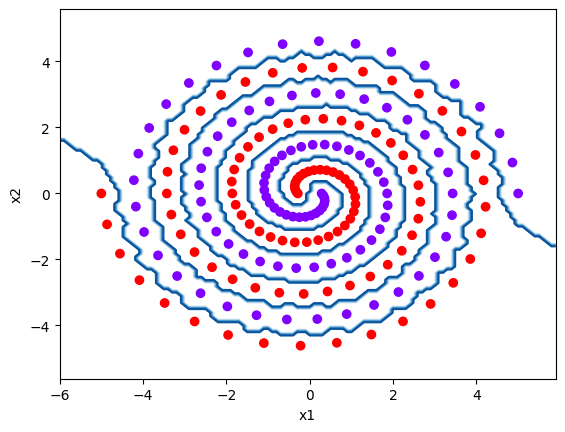

In [45]:
# Create a mesh to plot the decision boundaries
x1_min, x1_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
x2_min, x2_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                     np.arange(x2_min, x2_max, 0.1))

# Predict class using the classifier for each point in the mesh
y_pred = clf.predict(gaussianKernelGramMatrixFull(np.c_[x1_grid.ravel(), x2_grid.ravel()], X))
y_pred = y_pred.reshape(x1_grid.shape)

# Plot the decision boundaries
plt.contour(x1_grid, x2_grid, y_pred.astype(float), cmap=plt.cm.Blues)
plt.scatter(X[:,0], X[:,1], c=y, cmap="rainbow")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()